# Model making

Create full data set for all states and don't exclude TN 

read cancer data set: state, county, avg_cost
income data - create income agg data by state and county


In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

from cm import plot_confusion_matrix

import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

In [110]:
#Create a DataFrame, ha_costs_df, from the mmd_heart_attack_data.csv file.
ha_costs_df = pd.read_csv('../data/mmd_heart_attack_data.csv')
#Look at the head and tail of the DataFrame
ha_costs_df.head(-1)
ha_costs_df.rename(columns = {'analysis_value': 'ha_avg_cost'}, inplace = True)
ha_costs_df.head(-1)

,year,geography,measure,adjustment,analysis,domain,condition,primary_sex,primary_age,primary_dual,fips,county,state,urban,primary_race,primary_denominator,ha_avg_cost
0,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,1001,Autauga County,ALABAMA,Urban,All,undefined,40470
1,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,1003,Baldwin County,ALABAMA,Rural,All,undefined,36615
2,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,1005,Barbour County,ALABAMA,Rural,All,undefined,46509
3,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,1007,Bibb County,ALABAMA,Urban,All,undefined,42949
4,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,1009,Blount County,ALABAMA,Urban,All,undefined,50067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2650,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,72061,Guaynabo Municipio,PUERTO RICO,Urban,All,undefined,25049
2651,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,72097,Mayaguez Municipio,PUERTO RICO,Urban,All,undefined,28128
2652,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,72113,Ponce Municipio,PUERTO RICO,Urban,All,undefined,26403
2653,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,72125,San German Municipio,PUERTO RICO,Urban,All,undefined,26398


In [111]:
ha_costs_df['state'].value_counts()

TEXAS                   186
GEORGIA                 129
VIRGINIA                127
KENTUCKY                112
MISSOURI                106
ILLINOIS                 99
NORTH CAROLINA           99
IOWA                     94
TENNESSEE                91
INDIANA                  90
OHIO                     88
MICHIGAN                 83
MISSISSIPPI              75
ARKANSAS                 74
OKLAHOMA                 68
FLORIDA                  67
WISCONSIN                66
PENNSYLVANIA             66
ALABAMA                  65
KANSAS                   62
NEW YORK                 61
LOUISIANA                60
MINNESOTA                59
CALIFORNIA               56
WEST VIRGINIA            54
NEBRASKA                 50
SOUTH CAROLINA           44
WASHINGTON               35
COLORADO                 32
OREGON                   30
IDAHO                    28
NEW MEXICO               26
NORTH DAKOTA             25
MARYLAND                 24
SOUTH DAKOTA             24
UTAH                

In [112]:
ha_costs_df.shape

(2656, 17)

In [113]:
#Create a DataFrame, cancer_costs_df, from the mmd_cancer_data.csv file.
cancer_costs_df = pd.read_csv('../data/mmd_cancer_data.csv')
#Look at the head and tail of the DataFrame
cancer_costs_df.head(-1)
cancer_costs_df.rename(columns = {'analysis_value': 'cancer_avg_cost'}, inplace = True)
cancer_costs_df.head(-1)

,year,geography,measure,adjustment,analysis,domain,condition,primary_sex,primary_age,primary_dual,fips,county,state,urban,primary_race,primary_denominator,cancer_avg_cost
0,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,1001,Autauga County,ALABAMA,Urban,All,undefined,19293
1,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,1003,Baldwin County,ALABAMA,Rural,All,undefined,17151
2,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,1005,Barbour County,ALABAMA,Rural,All,undefined,19469
3,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,1007,Bibb County,ALABAMA,Urban,All,undefined,17234
4,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,1009,Blount County,ALABAMA,Urban,All,undefined,20317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3159,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,72143,Vega Alta Municipio,PUERTO RICO,Urban,All,undefined,12424
3160,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,72145,Vega Baja Municipio,PUERTO RICO,Urban,All,undefined,7364
3161,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,72147,Vieques Municipio,PUERTO RICO,Rural,All,undefined,9987
3162,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,72149,Villalba Municipio,PUERTO RICO,Urban,All,undefined,24127


In [114]:
cancer_costs_df['state'].value_counts()

TEXAS                   245
GEORGIA                 157
VIRGINIA                133
KENTUCKY                120
MISSOURI                115
KANSAS                  105
ILLINOIS                102
NORTH CAROLINA          100
IOWA                     99
TENNESSEE                95
INDIANA                  92
OHIO                     88
NEBRASKA                 87
MINNESOTA                87
MICHIGAN                 83
MISSISSIPPI              82
OKLAHOMA                 77
ARKANSAS                 75
WISCONSIN                72
ALABAMA                  67
PENNSYLVANIA             67
FLORIDA                  67
PUERTO RICO              64
LOUISIANA                64
COLORADO                 63
SOUTH DAKOTA             63
NEW YORK                 62
CALIFORNIA               58
WEST VIRGINIA            55
MONTANA                  54
NORTH DAKOTA             51
SOUTH CAROLINA           46
IDAHO                    42
WASHINGTON               39
OREGON                   36
NEW MEXICO          

In [115]:
cancer_costs_df.shape

(3165, 17)

In [116]:
#You should have found that the datasets have a different number of counties. 
#Bonus: Can you figure out which counties are missing from one of the datasets?
cancer_costs_df.loc[~cancer_costs_df['county'].isin(ha_costs_df['county'])]

,year,geography,measure,adjustment,analysis,domain,condition,primary_sex,primary_age,primary_dual,fips,county,state,urban,primary_race,primary_denominator,cancer_avg_cost
5,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,1011,Bullock County,ALABAMA,Rural,All,undefined,19369
68,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,2050,Bethel Census Area,ALASKA,Rural,All,undefined,20472
69,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,2060,Bristol Bay Borough,ALASKA,Rural,All,undefined,22547
70,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,2070,Dillingham Census Area,ALASKA,Rural,All,undefined,44017
72,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,2100,Haines Borough,ALASKA,Rural,All,undefined,31070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3160,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,72145,Vega Baja Municipio,PUERTO RICO,Urban,All,undefined,7364
3161,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,72147,Vieques Municipio,PUERTO RICO,Rural,All,undefined,9987
3162,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,72149,Villalba Municipio,PUERTO RICO,Urban,All,undefined,24127
3163,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,72151,Yabucoa Municipio,PUERTO RICO,Urban,All,undefined,8008


In [117]:
#Create a DataFrame, income_df, from the irs_county_2016.csv file.
income_df = pd.read_csv('../data/irs_county_2016.csv')
income_df.shape
income_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25536 entries, 0 to 25535
Columns: 148 entries, STATEFIPS to A11902
dtypes: int64(146), object(2)
memory usage: 28.8+ MB


In [118]:
income_df.head()

,STATEFIPS,STATE,COUNTYFIPS,COUNTYNAME,agi_stub,N1,mars1,MARS2,MARS4,PREP,...,N10300,A10300,N85530,A85530,N85300,A85300,N11901,A11901,N11902,A11902
0,1,AL,0,Alabama,1,26450,14680,9740,680,17780,...,4300,9256,70,57,0,0,2590,3685,11510,35079
1,1,AL,0,Alabama,2,285760,217880,25170,39740,143390,...,70050,40569,0,0,0,0,22720,11109,237630,263152
2,1,AL,0,Alabama,3,529780,259680,80320,181410,297440,...,297770,290358,0,0,0,0,41330,40647,474140,1569463
3,1,AL,0,Alabama,4,495750,211100,141800,127420,272030,...,397940,983800,40,22,0,0,73880,110840,415850,1173195
4,1,AL,0,Alabama,5,263130,82330,137610,35760,154540,...,252940,1346083,20,27,0,0,63240,140446,194790,542205


In [119]:
#Keep only the following columns:
    #['STATE', 'COUNTYNAME', 'agi_stub', 'N1', 'mars1', 'MARS2', 'MARS4', 'N2', 'NUMDEP', 'ELDERLY', 'A00100', 'N02650', 'A02650', 'N02300', 'A02300']
income_df = income_df.loc[:, ['STATE', 'COUNTYNAME', 'agi_stub', 'N1', 'mars1', 'MARS2', 'MARS4', 'N2', 
                              'NUMDEP', 'ELDERLY','A00100', 'N02650', 'A02650', 'N02300', 'A02300']]

In [120]:
#Rename columns
income_df.columns = ['state', 'county', 'income_bucket', 'return_count', 'single_returns', 
                     'joint_returns', 'head_of_house_returns', 'exemptions', 'dependents', 
                     'elderly', 'agi', 'returns_with_total_inc','total_inc_amt', 'returns_with_unemployment', 
                     'unemployment_comp']
income_df.head(-1)

,state,county,income_bucket,return_count,single_returns,joint_returns,head_of_house_returns,exemptions,dependents,elderly,agi,returns_with_total_inc,total_inc_amt,returns_with_unemployment,unemployment_comp
0,AL,Alabama,1,26450,14680,9740,680,40700,5590,13000,-1679314,19140,-1657452,60,203
1,AL,Alabama,2,285760,217880,25170,39740,296830,78450,48270,1582247,285760,1632624,4180,10772
2,AL,Alabama,3,529780,259680,80320,181410,1000100,413070,102390,9029279,529780,9158151,18220,52886
3,AL,Alabama,4,495750,211100,141800,127420,996020,360090,109080,17834120,495750,18016190,14020,41072
4,AL,Alabama,5,263130,82330,137610,35760,583110,182490,74930,16163220,263130,16321828,7290,23990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25530,WY,Weston County,3,540,320,120,90,870,230,200,9299,540,9491,50,264
25531,WY,Weston County,4,610,310,210,70,1100,280,190,22565,610,22932,50,324
25532,WY,Weston County,5,460,150,270,40,1050,320,150,28849,460,29192,30,222
25533,WY,Weston County,6,460,90,330,40,1170,380,140,39587,460,39941,20,180


In [121]:
income_county_agg = income_df.groupby([]'state', 'county']).sum() 
#revisit the code: you have to agg by state and county.

In [122]:
print(income_county_agg)
income_county_agg.info()

                      income_bucket  return_count  single_returns  \
county                                                              
Abbeville County                 36          9620            3480   
Acadia Parish                    36         24340            9390   
Accomack County                  36         15940            7020   
Ada County                       36        207610           96130   
Adair County                    144         27820           11770   
...                             ...           ...             ...   
Yukon-Koyukuk Census             36          2760            1620   
Yuma County                      72         88570           31870   
Zapata County                    36          4920            1740   
Zavala County                    36          4290            1600   
Ziebach County                   36           500             220   

                      joint_returns  head_of_house_returns  exemptions  \
county                      

In [123]:
#Be sure to also `reset_index()` so that our aggregated data is re-indexed to begin at 0. 
income_county_agg = income_county_agg.reset_index()
print(income_county_agg)

                    county  income_bucket  return_count  single_returns  \
0         Abbeville County             36          9620            3480   
1            Acadia Parish             36         24340            9390   
2          Accomack County             36         15940            7020   
3               Ada County             36        207610           96130   
4             Adair County            144         27820           11770   
...                    ...            ...           ...             ...   
1921  Yukon-Koyukuk Census             36          2760            1620   
1922           Yuma County             72         88570           31870   
1923         Zapata County             36          4920            1740   
1924         Zavala County             36          4290            1600   
1925        Ziebach County             36           500             220   

      joint_returns  head_of_house_returns  exemptions  dependents  elderly  \
0              3650 

In [124]:
#DataFrame which gives the approximate average household income for each county. 
#Calculate this as 1000*`total_inc_amt` / `return_count
income_county_agg['approx_avg_income']= 1000 * income_county_agg['total_inc_amt']/income_county_agg['return_count']
income_county_agg.head(-1)

,county,income_bucket,return_count,single_returns,joint_returns,head_of_house_returns,exemptions,dependents,elderly,agi,returns_with_total_inc,total_inc_amt,returns_with_unemployment,unemployment_comp,approx_avg_income
0,Abbeville County,36,9620,3480,3650,2260,19730,6980,2480,411082,9580,416060,420,676,43249.480249
1,Acadia Parish,36,24340,9390,9450,5200,52710,20270,4970,1127591,24250,1147323,860,3109,47137.345933
2,Accomack County,36,15940,7020,5420,3120,30420,9780,4870,705006,15890,715259,420,1255,44871.957340
3,Ada County,36,207610,96130,89990,19370,414470,129340,50170,14763616,206870,15019526,7460,27477,72344.906315
4,Adair County,144,27820,11770,11860,3820,56650,18750,7120,1118205,27740,1137503,1220,4168,40887.958303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,Yuba County,36,29100,11890,11800,4980,65650,25800,5880,1342306,29000,1358097,2820,12666,46670.000000
1921,Yukon-Koyukuk Census,36,2760,1620,610,470,4630,1600,590,93563,2760,94366,780,1859,34190.579710
1922,Yuma County,72,88570,31870,35120,20680,204720,84340,18410,3713220,88280,3761725,14300,60064,42471.773738
1923,Zapata County,36,4920,1740,1570,1610,11700,5440,880,164435,4890,166193,480,2968,33779.065041


In [125]:
income_county_agg['county'].value_counts

<bound method IndexOpsMixin.value_counts of 0           Abbeville County
1              Acadia Parish
2            Accomack County
3                 Ada County
4               Adair County
                ...         
1921    Yukon-Koyukuk Census
1922             Yuma County
1923           Zapata County
1924           Zavala County
1925          Ziebach County
Name: county, Length: 1926, dtype: object>

In [126]:
income_county_agg['county'].nunique()

1926

Merge heart attack and cancer data sets

In [127]:
cancer_costs_df.head()

,year,geography,measure,adjustment,analysis,domain,condition,primary_sex,primary_age,primary_dual,fips,county,state,urban,primary_race,primary_denominator,cancer_avg_cost
0,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,1001,Autauga County,ALABAMA,Urban,All,undefined,19293
1,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,1003,Baldwin County,ALABAMA,Rural,All,undefined,17151
2,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,1005,Barbour County,ALABAMA,Rural,All,undefined,19469
3,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,1007,Bibb County,ALABAMA,Urban,All,undefined,17234
4,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,1009,Blount County,ALABAMA,Urban,All,undefined,20317


In [128]:
ha_costs_df.head()

,year,geography,measure,adjustment,analysis,domain,condition,primary_sex,primary_age,primary_dual,fips,county,state,urban,primary_race,primary_denominator,ha_avg_cost
0,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,1001,Autauga County,ALABAMA,Urban,All,undefined,40470
1,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,1003,Baldwin County,ALABAMA,Rural,All,undefined,36615
2,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,1005,Barbour County,ALABAMA,Rural,All,undefined,46509
3,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,1007,Bibb County,ALABAMA,Urban,All,undefined,42949
4,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,1009,Blount County,ALABAMA,Urban,All,undefined,50067


In [129]:
ha_cancer_costs_df = pd.merge(cancer_costs_df.loc[:,['state', 'county','primary_sex', 'primary_age', 'urban', 'cancer_avg_cost']], 
                                     ha_costs_df.loc[:,['state', 'county', 'ha_avg_cost']], on='state' and 'county', how='inner')
ha_cancer_costs_df.head(-1)

,state_x,county,primary_sex,primary_age,urban,cancer_avg_cost,state_y,ha_avg_cost
0,ALABAMA,Autauga County,All,All,Urban,19293,ALABAMA,40470
1,ALABAMA,Baldwin County,All,All,Rural,17151,ALABAMA,36615
2,ALABAMA,Baldwin County,All,All,Rural,17151,GEORGIA,49751
3,GEORGIA,Baldwin County,All,All,Rural,20352,ALABAMA,36615
4,GEORGIA,Baldwin County,All,All,Rural,20352,GEORGIA,49751
...,...,...,...,...,...,...,...,...
12791,PUERTO RICO,Guaynabo Municipio,All,All,Urban,10485,PUERTO RICO,25049
12792,PUERTO RICO,Mayaguez Municipio,All,All,Urban,11440,PUERTO RICO,28128
12793,PUERTO RICO,Ponce Municipio,All,All,Urban,10827,PUERTO RICO,26403
12794,PUERTO RICO,San German Municipio,All,All,Urban,14660,PUERTO RICO,26398


In [130]:
ha_cancer_costs_df['state_x'].value_counts

<bound method IndexOpsMixin.value_counts of 0            ALABAMA
1            ALABAMA
2            ALABAMA
3            GEORGIA
4            GEORGIA
            ...     
12792    PUERTO RICO
12793    PUERTO RICO
12794    PUERTO RICO
12795    PUERTO RICO
12796    PUERTO RICO
Name: state_x, Length: 12797, dtype: object>

In [131]:
ha_cancer_costs_df['state_x'].nunique()

52

In [132]:
##Create `state_dict`, a dictionary that uses the provides descripton of state abbreviation
#import state abbreviation dataset
state_abb_df = pd.read_csv('../data/state_abbrev.csv')
state_abb_df.head()

,name,abbrev
0,ALABAMA,AL
1,ALASKA,AK
2,ARIZONA,AZ
3,ARKANSAS,AR
4,CALIFORNIA,CA


In [133]:
ha_cancer_costs_df.head()

,state_x,county,primary_sex,primary_age,urban,cancer_avg_cost,state_y,ha_avg_cost
0,ALABAMA,Autauga County,All,All,Urban,19293,ALABAMA,40470
1,ALABAMA,Baldwin County,All,All,Rural,17151,ALABAMA,36615
2,ALABAMA,Baldwin County,All,All,Rural,17151,GEORGIA,49751
3,GEORGIA,Baldwin County,All,All,Rural,20352,ALABAMA,36615
4,GEORGIA,Baldwin County,All,All,Rural,20352,GEORGIA,49751


In [134]:
ha_cancer_costs_df['state_x']=ha_cancer_costs_df.state_x.map(state_abb_df.set_index('name')['abbrev'].to_dict())

In [135]:
ha_cancer_costs_df.head()

,state_x,county,primary_sex,primary_age,urban,cancer_avg_cost,state_y,ha_avg_cost
0,AL,Autauga County,All,All,Urban,19293,ALABAMA,40470
1,AL,Baldwin County,All,All,Rural,17151,ALABAMA,36615
2,AL,Baldwin County,All,All,Rural,17151,GEORGIA,49751
3,GA,Baldwin County,All,All,Rural,20352,ALABAMA,36615
4,GA,Baldwin County,All,All,Rural,20352,GEORGIA,49751


In [136]:
income_county_agg.head(-1)

,county,income_bucket,return_count,single_returns,joint_returns,head_of_house_returns,exemptions,dependents,elderly,agi,returns_with_total_inc,total_inc_amt,returns_with_unemployment,unemployment_comp,approx_avg_income
0,Abbeville County,36,9620,3480,3650,2260,19730,6980,2480,411082,9580,416060,420,676,43249.480249
1,Acadia Parish,36,24340,9390,9450,5200,52710,20270,4970,1127591,24250,1147323,860,3109,47137.345933
2,Accomack County,36,15940,7020,5420,3120,30420,9780,4870,705006,15890,715259,420,1255,44871.957340
3,Ada County,36,207610,96130,89990,19370,414470,129340,50170,14763616,206870,15019526,7460,27477,72344.906315
4,Adair County,144,27820,11770,11860,3820,56650,18750,7120,1118205,27740,1137503,1220,4168,40887.958303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,Yuba County,36,29100,11890,11800,4980,65650,25800,5880,1342306,29000,1358097,2820,12666,46670.000000
1921,Yukon-Koyukuk Census,36,2760,1620,610,470,4630,1600,590,93563,2760,94366,780,1859,34190.579710
1922,Yuma County,72,88570,31870,35120,20680,204720,84340,18410,3713220,88280,3761725,14300,60064,42471.773738
1923,Zapata County,36,4920,1740,1570,1610,11700,5440,880,164435,4890,166193,480,2968,33779.065041


In [137]:
ha_cancer_costs_incomeavg_df = pd.merge(ha_cancer_costs_df, 
                                        income_county_agg.loc[:,['county', 'approx_avg_income', 'agi', 'income_bucket']], on='county', how='inner')
ha_cancer_costs_incomeavg_df.head(-1)

,state_x,county,primary_sex,primary_age,urban,cancer_avg_cost,state_y,ha_avg_cost,approx_avg_income,agi,income_bucket
0,AL,Autauga County,All,All,Urban,19293,ALABAMA,40470,55680.240764,1327941,36
1,AL,Baldwin County,All,All,Rural,17151,ALABAMA,36615,59993.832756,6646034,72
2,AL,Baldwin County,All,All,Rural,17151,GEORGIA,49751,59993.832756,6646034,72
3,GA,Baldwin County,All,All,Rural,20352,ALABAMA,36615,59993.832756,6646034,72
4,GA,Baldwin County,All,All,Rural,20352,GEORGIA,49751,59993.832756,6646034,72
...,...,...,...,...,...,...,...,...,...,...,...
12753,WY,Goshen County,All,All,Rural,19845,WYOMING,58931,49689.087657,272917,36
12754,WY,Laramie County,All,All,Urban,23721,WYOMING,53715,61784.845944,2912660,36
12755,WY,Natrona County,All,All,Urban,19582,WYOMING,36263,70450.337382,2564597,36
12756,WY,Sweetwater County,All,All,Rural,23139,WYOMING,57980,67995.656617,1319648,36


In [138]:
ha_cancer_costs_incomeavg_df['ha_cost_income_ratio'] = ha_cancer_costs_incomeavg_df.ha_avg_cost / ha_cancer_costs_incomeavg_df.approx_avg_income
ha_cancer_costs_incomeavg_df['cancer_cost_income_ratio'] = ha_cancer_costs_incomeavg_df.cancer_avg_cost / ha_cancer_costs_incomeavg_df.approx_avg_income
ha_cancer_costs_incomeavg_df.head(-1)

,state_x,county,primary_sex,primary_age,urban,cancer_avg_cost,state_y,ha_avg_cost,approx_avg_income,agi,income_bucket,ha_cost_income_ratio,cancer_cost_income_ratio
0,AL,Autauga County,All,All,Urban,19293,ALABAMA,40470,55680.240764,1327941,36,0.726829,0.346496
1,AL,Baldwin County,All,All,Rural,17151,ALABAMA,36615,59993.832756,6646034,72,0.610313,0.285879
2,AL,Baldwin County,All,All,Rural,17151,GEORGIA,49751,59993.832756,6646034,72,0.829269,0.285879
3,GA,Baldwin County,All,All,Rural,20352,ALABAMA,36615,59993.832756,6646034,72,0.610313,0.339235
4,GA,Baldwin County,All,All,Rural,20352,GEORGIA,49751,59993.832756,6646034,72,0.829269,0.339235
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12753,WY,Goshen County,All,All,Rural,19845,WYOMING,58931,49689.087657,272917,36,1.185995,0.399383
12754,WY,Laramie County,All,All,Urban,23721,WYOMING,53715,61784.845944,2912660,36,0.869388,0.383929
12755,WY,Natrona County,All,All,Urban,19582,WYOMING,36263,70450.337382,2564597,36,0.514731,0.277955
12756,WY,Sweetwater County,All,All,Rural,23139,WYOMING,57980,67995.656617,1319648,36,0.852702,0.340301


In [140]:
ha_cancer_costs_incomeavg_df.cancer_cost_income_ratio.describe()

count    12759.000000
mean         0.352436
std          0.083984
min          0.090481
25%          0.292676
50%          0.342923
75%          0.399912
max          1.138648
Name: cancer_cost_income_ratio, dtype: float64

In [141]:
#creating depedendent variable
#average cost for cancer care is above the average cost or equal to or below the average cost
ha_cancer_costs_incomeavg_df['cancer_cost_income_ratio_above_avg_y'] = ha_cancer_costs_incomeavg_df.cancer_cost_income_ratio >  0.352436
ha_cancer_costs_incomeavg_df.head()

,state_x,county,primary_sex,primary_age,urban,cancer_avg_cost,state_y,ha_avg_cost,approx_avg_income,agi,income_bucket,ha_cost_income_ratio,cancer_cost_income_ratio,cancer_cost_income_ratio_above_avg_y
0,AL,Autauga County,All,All,Urban,19293,ALABAMA,40470,55680.240764,1327941,36,0.726829,0.346496,False
1,AL,Baldwin County,All,All,Rural,17151,ALABAMA,36615,59993.832756,6646034,72,0.610313,0.285879,False
2,AL,Baldwin County,All,All,Rural,17151,GEORGIA,49751,59993.832756,6646034,72,0.829269,0.285879,False
3,GA,Baldwin County,All,All,Rural,20352,ALABAMA,36615,59993.832756,6646034,72,0.610313,0.339235,False
4,GA,Baldwin County,All,All,Rural,20352,GEORGIA,49751,59993.832756,6646034,72,0.829269,0.339235,False


In [142]:
#get dummmies
ha_cancer_costs_incomeavg_df = pd.get_dummies(ha_cancer_costs_incomeavg_df, columns = ['urban'], drop_first = True)

In [144]:
ha_cancer_costs_incomeavg_df.head()

,state_x,county,primary_sex,primary_age,cancer_avg_cost,state_y,ha_avg_cost,approx_avg_income,agi,income_bucket,ha_cost_income_ratio,cancer_cost_income_ratio,cancer_cost_income_ratio_above_avg_y,urban_Urban
0,AL,Autauga County,All,All,19293,ALABAMA,40470,55680.240764,1327941,36,0.726829,0.346496,False,1
1,AL,Baldwin County,All,All,17151,ALABAMA,36615,59993.832756,6646034,72,0.610313,0.285879,False,0
2,AL,Baldwin County,All,All,17151,GEORGIA,49751,59993.832756,6646034,72,0.829269,0.285879,False,0
3,GA,Baldwin County,All,All,20352,ALABAMA,36615,59993.832756,6646034,72,0.610313,0.339235,False,0
4,GA,Baldwin County,All,All,20352,GEORGIA,49751,59993.832756,6646034,72,0.829269,0.339235,False,0


In [149]:
#log reg model
x = ha_cancer_costs_incomeavg_df[['urban_Urban', 'agi']]
y = ha_cancer_costs_incomeavg_df['cancer_cost_income_ratio_above_avg_y']

In [150]:
logistic_model = LogisticRegression()
logistic_model.fit(x, y)

LogisticRegression()

Text(0.5, 1.0, 'Logistic Regression Coefficients')

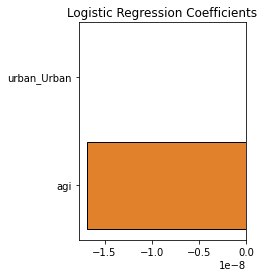

In [151]:
fig, ax = plt.subplots(figsize = (3,4))
sns.barplot(x = logistic_model.coef_[0], y = list(x.columns), ax = ax, edgecolor = 'black')
plt.title('Logistic Regression Coefficients')

In [152]:
#machine learning
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 321)